In [16]:
%matplotlib notebook
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

size = 512
shape = (size, size)
low = -0.5
high = 0.5
x = np.random.uniform(low, high, shape)

x_scaled = 255*(x + 0.5) # scaline, and now distributed uniformly between 0 and 1



In [17]:
# create empty y array
shape = (size,size)
val = 0
dt = np.double
y = np.empty(shape,dtype=dt)
y.fill(val)

for m in range(size):
    for n in range(size):
        y[m][n] = 3*x[m][n]
        if (m-1 >= 0):
            y[m][n] += 0.99*y[m-1][n]
        if (n-1 >= 0):
            y[m][n] += 0.99*y[m][n-1]
        if (m-1 > 0 and n > 0):
            y[m][n] += -0.9801*y[m-1][n-1]
            

In [18]:
y = y + 127

# for m in range(size):
#     for n in range(size):
#         if y[m][n] > 255:
#             y[m][n] = 255
#         if y[m][n] < 0:
#             y[m][n] = 0

In [19]:
# define function
def BetterSpecAnal(x):
    N = 64
    # create hamming window
    W = np.outer(np.hamming(N), np.hamming(N))

    # calculate center of image
    cenx = len(x[0])/2
    ceny = len(x)/2
    
    # initialize empty Zabs summer
    shape = (N,N)
    val = 0
    dt = x.dtype
    Zsum = np.empty(shape,dtype=dt)
    Zsum.fill(val)
    
    I = [-2, -1, 0, 1, 2]
    J = [-2, -1, 0, 1, 2]
    
    for i in I:
        for j in J:
            # determine new location for window
            # create 64 x 64 array based on new window location
            y = x[int(cenx + (i-1)*N):int(cenx + i*N),\
                  int(ceny + (j-1)*N):int(ceny + j*N)]
            z = y*W
            # compute squared DFT magnitude
            Z = (1/N**2)*np.abs(np.fft.fft2(z))**2
            Z = np.fft.fftshift(Z)
            Z = np.log(Z)
            Zsum += Z
            
    Zavg = (1/25)*Zsum

    return Zavg

<IPython.core.display.Javascript object>


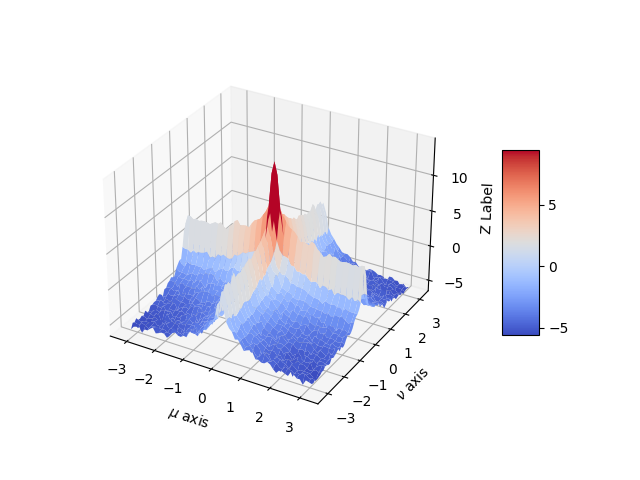

(64, 64)
[-3.14159265 -3.04185955 -2.94212645 -2.84239335 -2.74266025 -2.64292715
 -2.54319405 -2.44346095 -2.34372785 -2.24399475 -2.14426165 -2.04452855
 -1.94479545 -1.84506235 -1.74532925 -1.64559615 -1.54586305 -1.44612995
 -1.34639685 -1.24666375 -1.14693065 -1.04719755 -0.94746445 -0.84773135
 -0.74799825 -0.64826515 -0.54853205 -0.44879895 -0.34906585 -0.24933275
 -0.14959965 -0.04986655  0.04986655  0.14959965  0.24933275  0.34906585
  0.44879895  0.54853205  0.64826515  0.74799825  0.84773135  0.94746445
  1.04719755  1.14693065  1.24666375  1.34639685  1.44612995  1.54586305
  1.64559615  1.74532925  1.84506235  1.94479545  2.04452855  2.14426165
  2.24399475  2.34372785  2.44346095  2.54319405  2.64292715  2.74266025
  2.84239335  2.94212645  3.04185955  3.14159265]
14.677608067018712


In [20]:
N = 64

Zbetter = BetterSpecAnal(y-127)

# Plot the result using a 3-D mesh plot and label the x and y axises properly. 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.linspace(-np.pi, np.pi, num = N)
X, Y = np.meshgrid(a, b)

print(np.shape(X))
print(X[32])

surf = ax.plot_surface(X, Y, Zbetter, cmap=plt.cm.coolwarm)

ax.set_xlabel('$\mu$ axis')
ax.set_ylabel('$\\nu$ axis')
ax.set_zlabel('Z Label')

fig.colorbar(surf, shrink=0.5, aspect=5, pad = 0.1)

import io
# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
img_out = Image.open(png1)

# Save as TIFF
img_out.save("L2Q2Estimate.tif")
png1.close()

plt.show()

print(Zbetter[32][32])